In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
os.chdir('pps/')

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

***Warning: Detected response matrix energy bin value = 0 (or neg).
     XSPEC will instead use small finite value (response file will not be altered).

1 spectrum  in use
 
Spectral Data File: P0886121201M1S001SRSPEC000A.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.071e-03 +/- 4.730e-04 (35.4 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-7
  Telescope: XMM Instrument: EMOS1  Channel Type: PI
  Exposure Time: 2.635e+04 sec
 Using fit statistic: chi
 Using Background File                P0886121201M1S001BGSPEC000A.FTZ
  Background Exposure Time: 2.635e+04 sec
 Using Response (RMF) File            m1_e13_im_pall_o.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0886121201M1S001SRCARF000A.FTZ



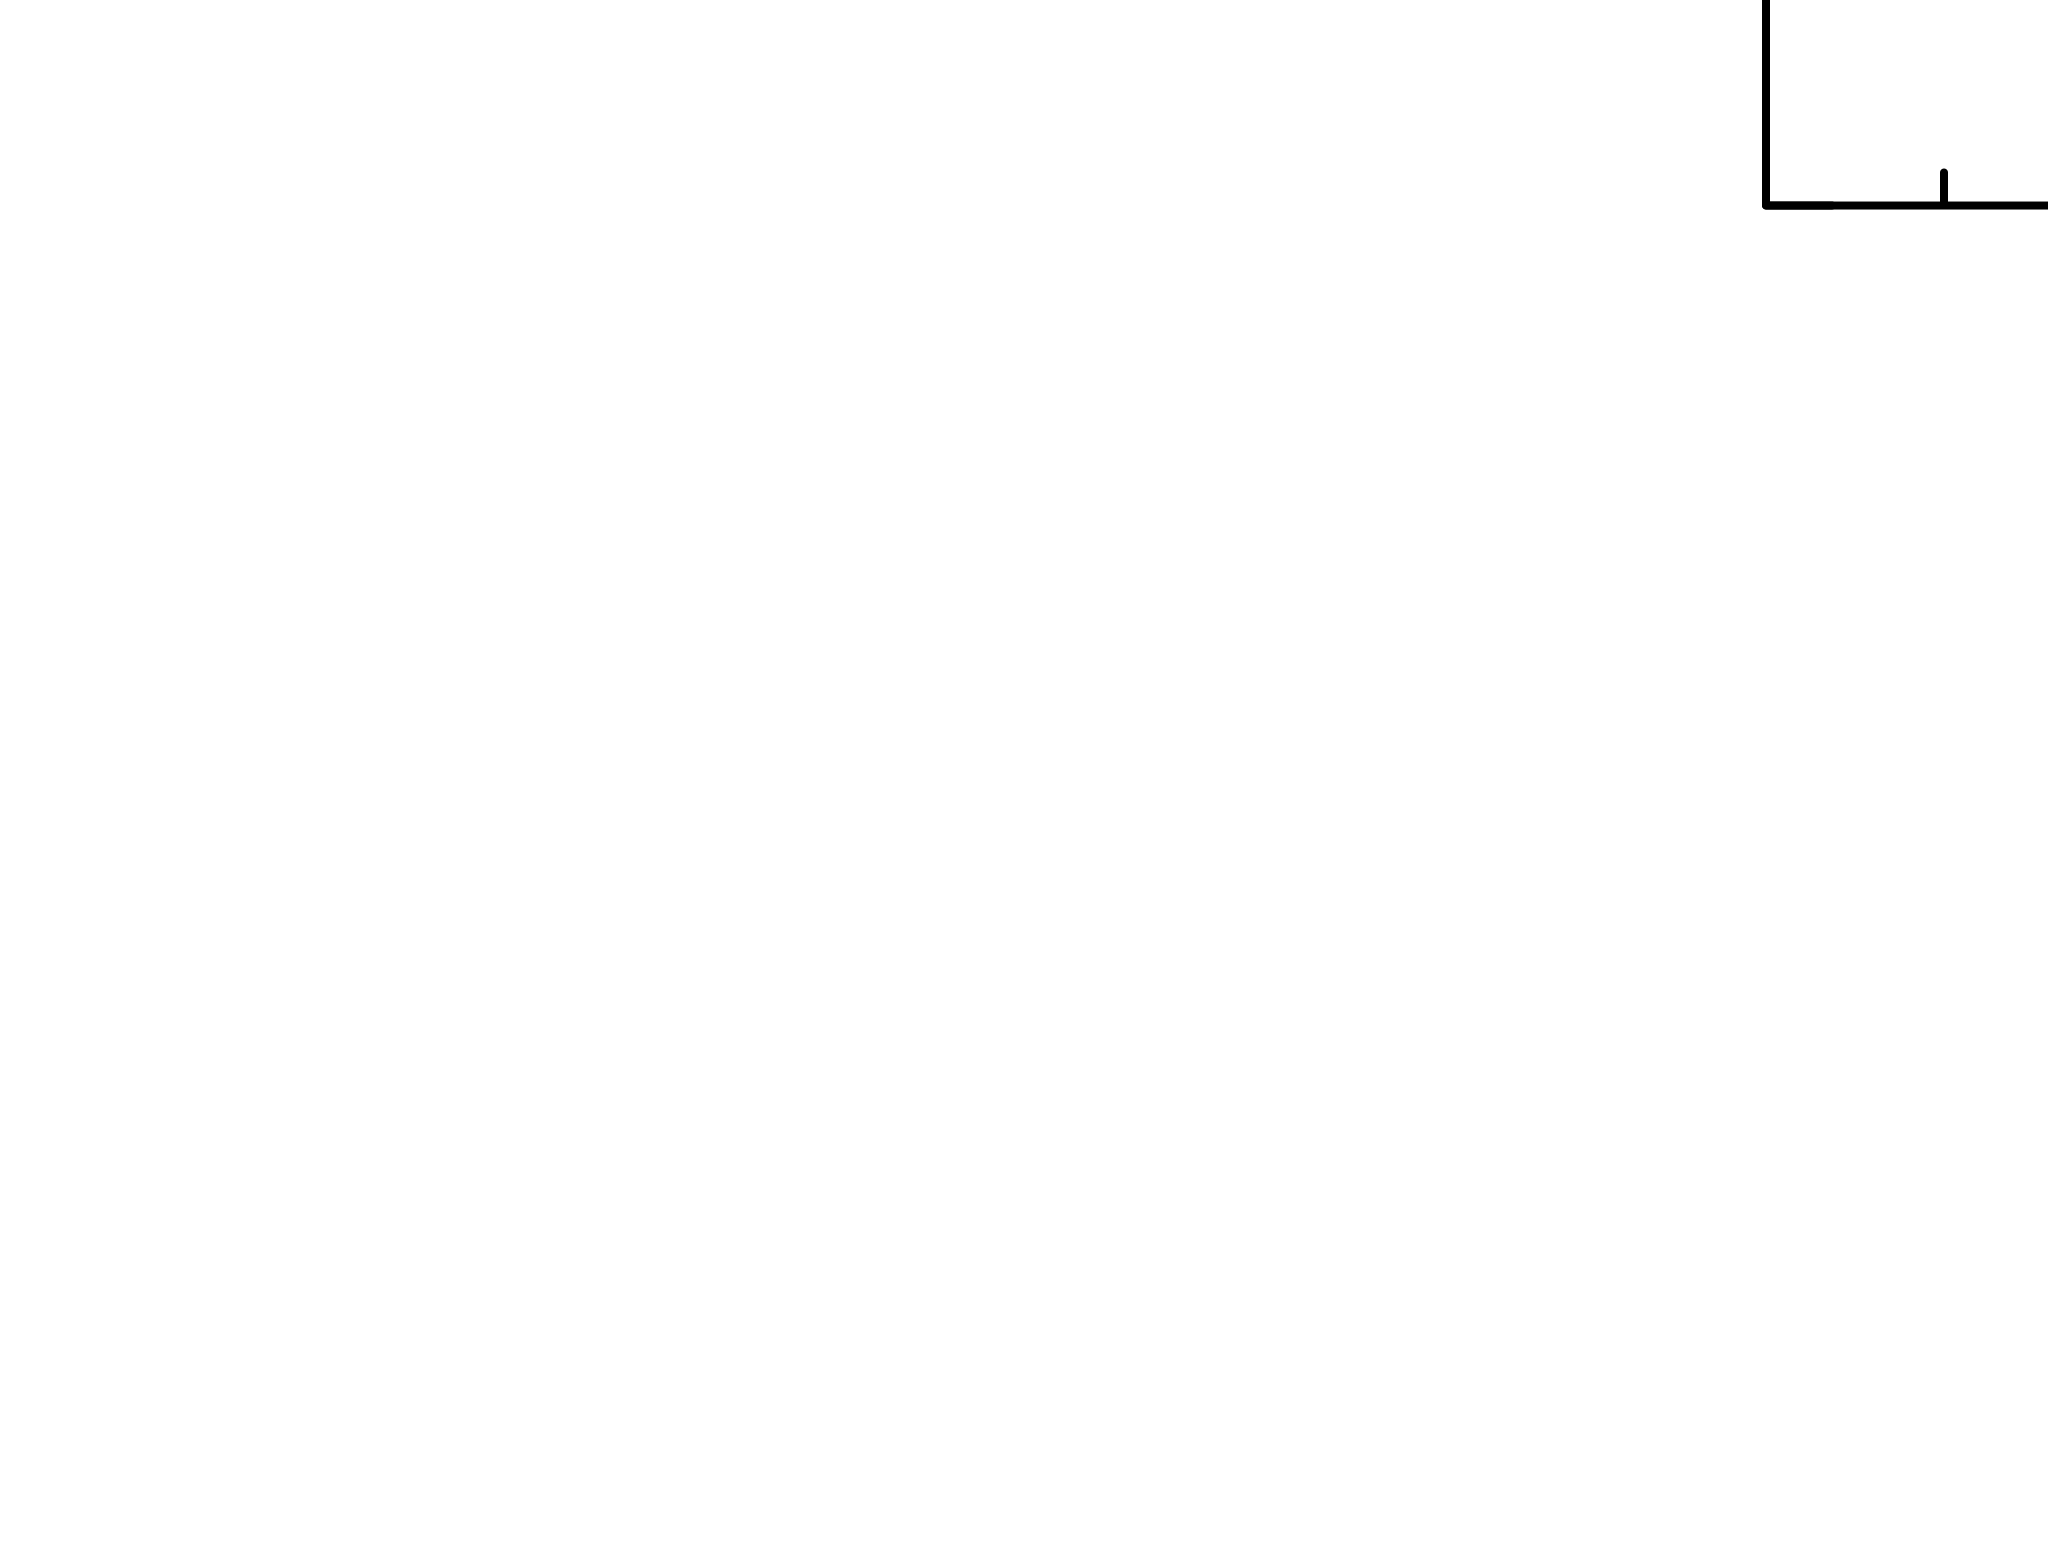

In [2]:
spec_fnames = glob.glob('P*M1S*SRSPEC*.FTZ')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              7.175338e+11     using 7 bins.

Tes

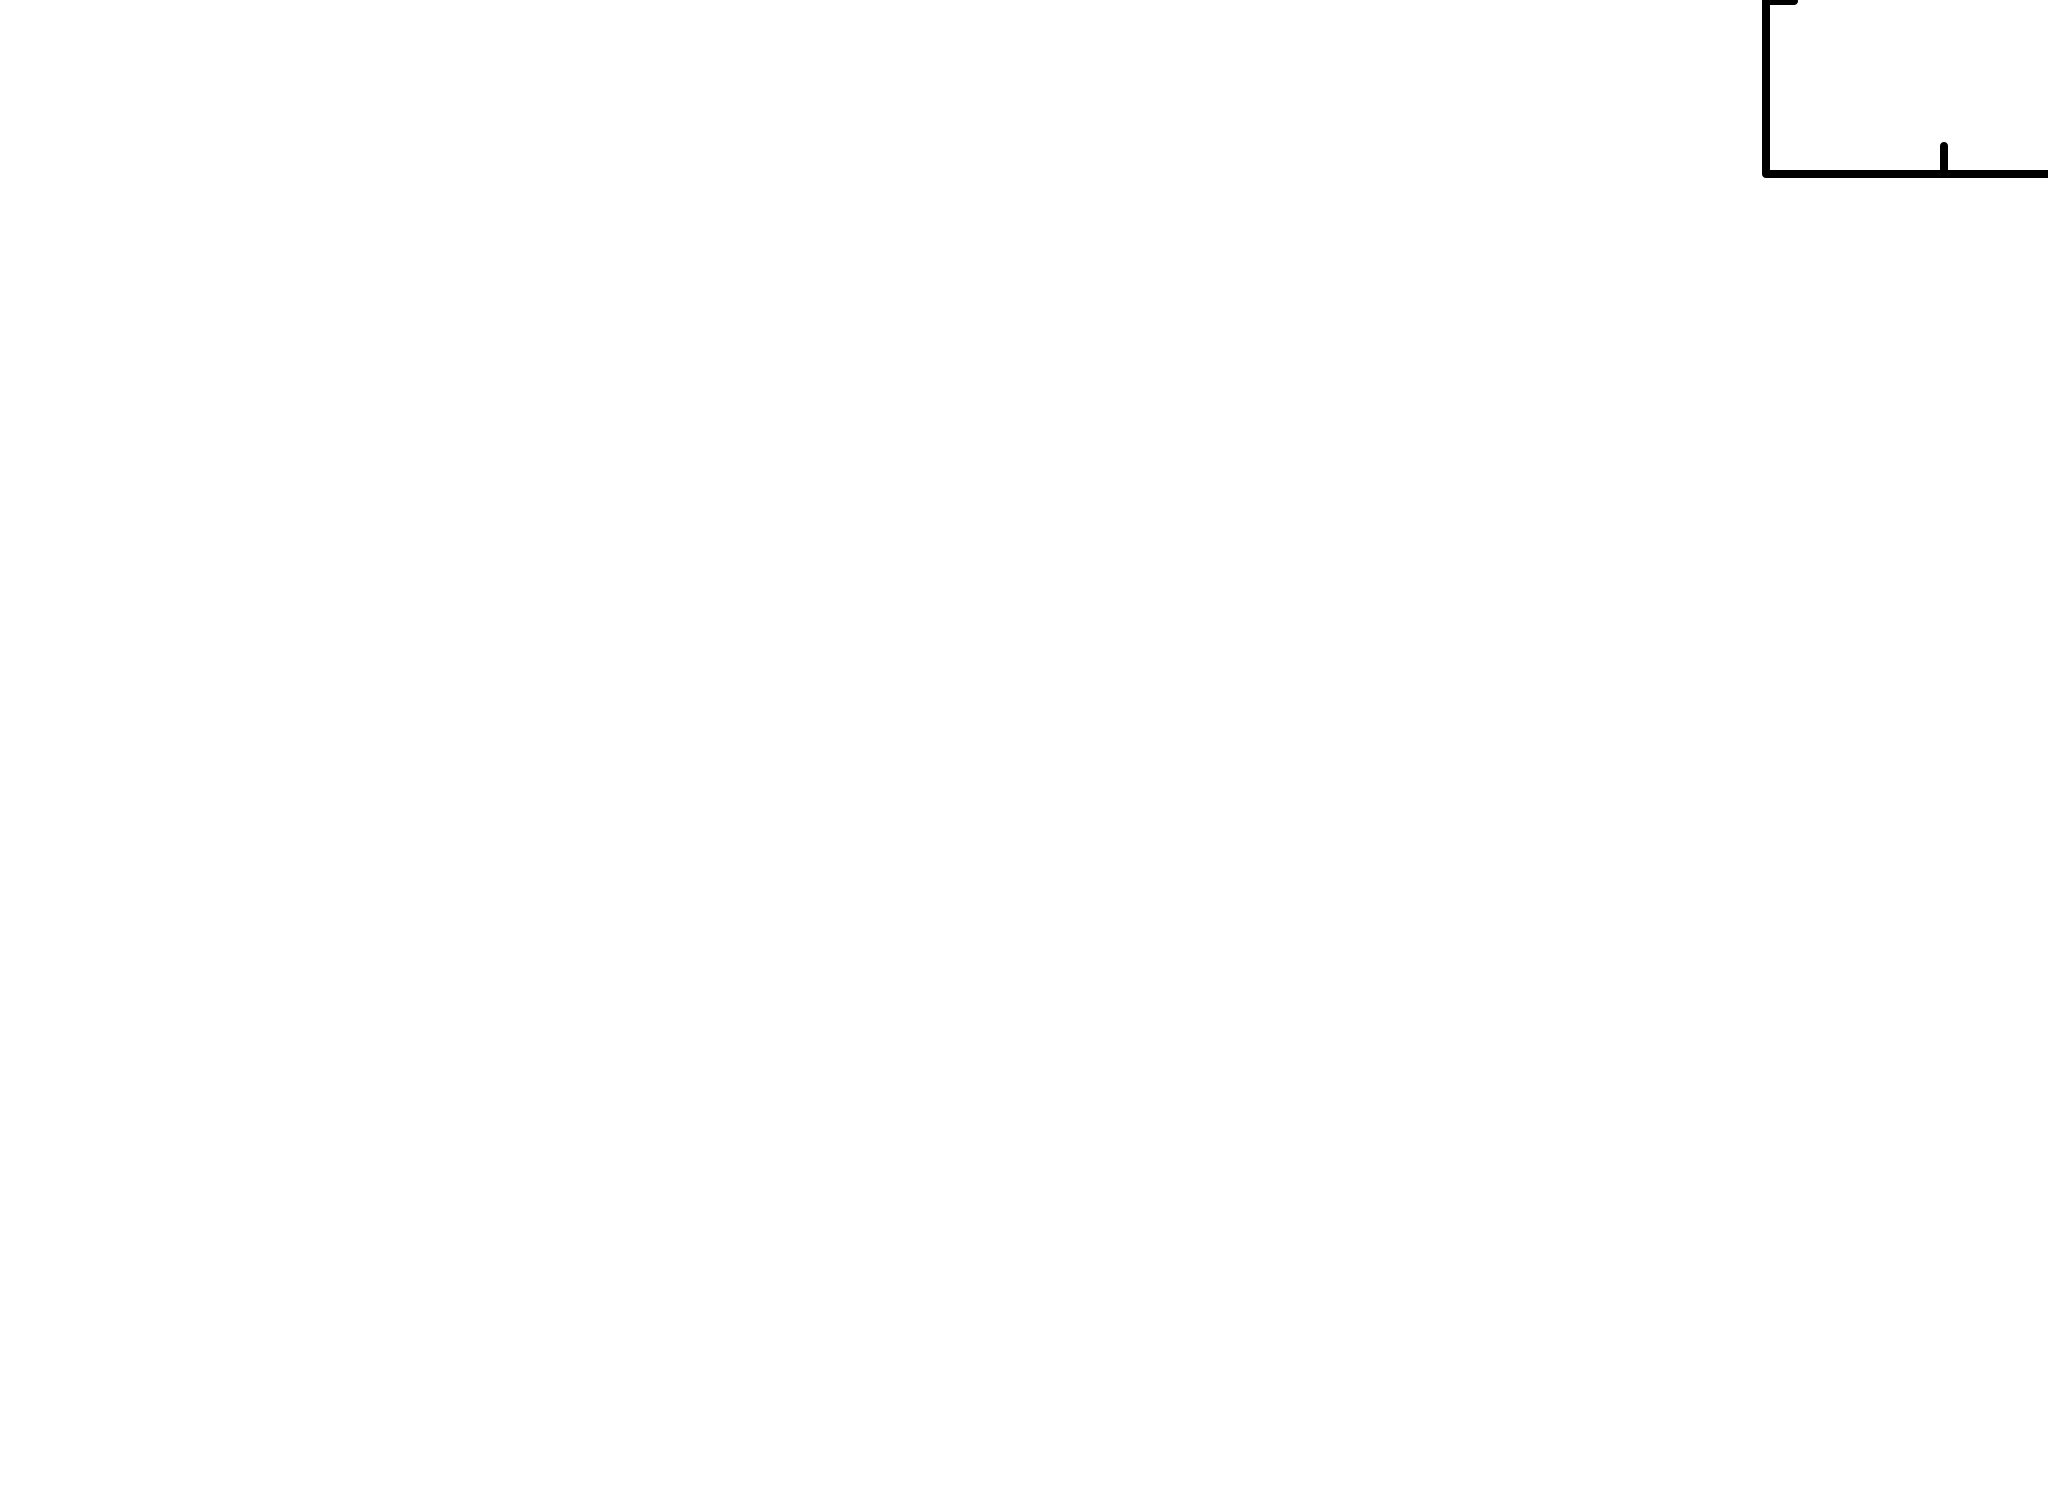

In [3]:
#spec.ignore("**-0.2 12.0-**")
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

In [4]:
Fit.error("1")
Fit.error("2")

 Parameter   Confidence Range (2.706)
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
5.59166      0.0946541    14   6.67934e-15       2.65565   3.35378e-06
 Variances and Principal Axes
                 1        2        3  
 6.1142E-13| -0.0000  -0.0000   1.0000  
 5.6943E-01|  0.9168   0.3993   0.0000  
 5.7117E+00| -0.3993   0.9168   0.0000  
----------------------------------------

  Covariance Matrix
        1           2           3   
   1.389e+00  -1.883e+00  -4.220e-06
  -1.883e+00   4.892e+00   1.196e-05
  -4.220e-06   1.196e-05   3.007e-11
------------------------------------

Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    6.67934E-15  +/-  1.17871      
   2    2   bbody      kT         keV      2.65565      +/-  2.21173      
   3    2   bbody      norm                3.35378E-06  +/-  5.48330E-06  


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.945657e+10     using 7 bins.

Test statistic : Chi-Squared              4.945657e+10     using 7 bins.
 Null hypothesis probability of 0.000000e+00 with 4 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
11.8307      0.280537      0       1.10299       18.2493   1.37036e-05
11.1867      47045         0       1.01982       60.4578   1.63638e-05
10.2464      43891.9      -1       1.41699       197.039   2.58808e-05
8.6

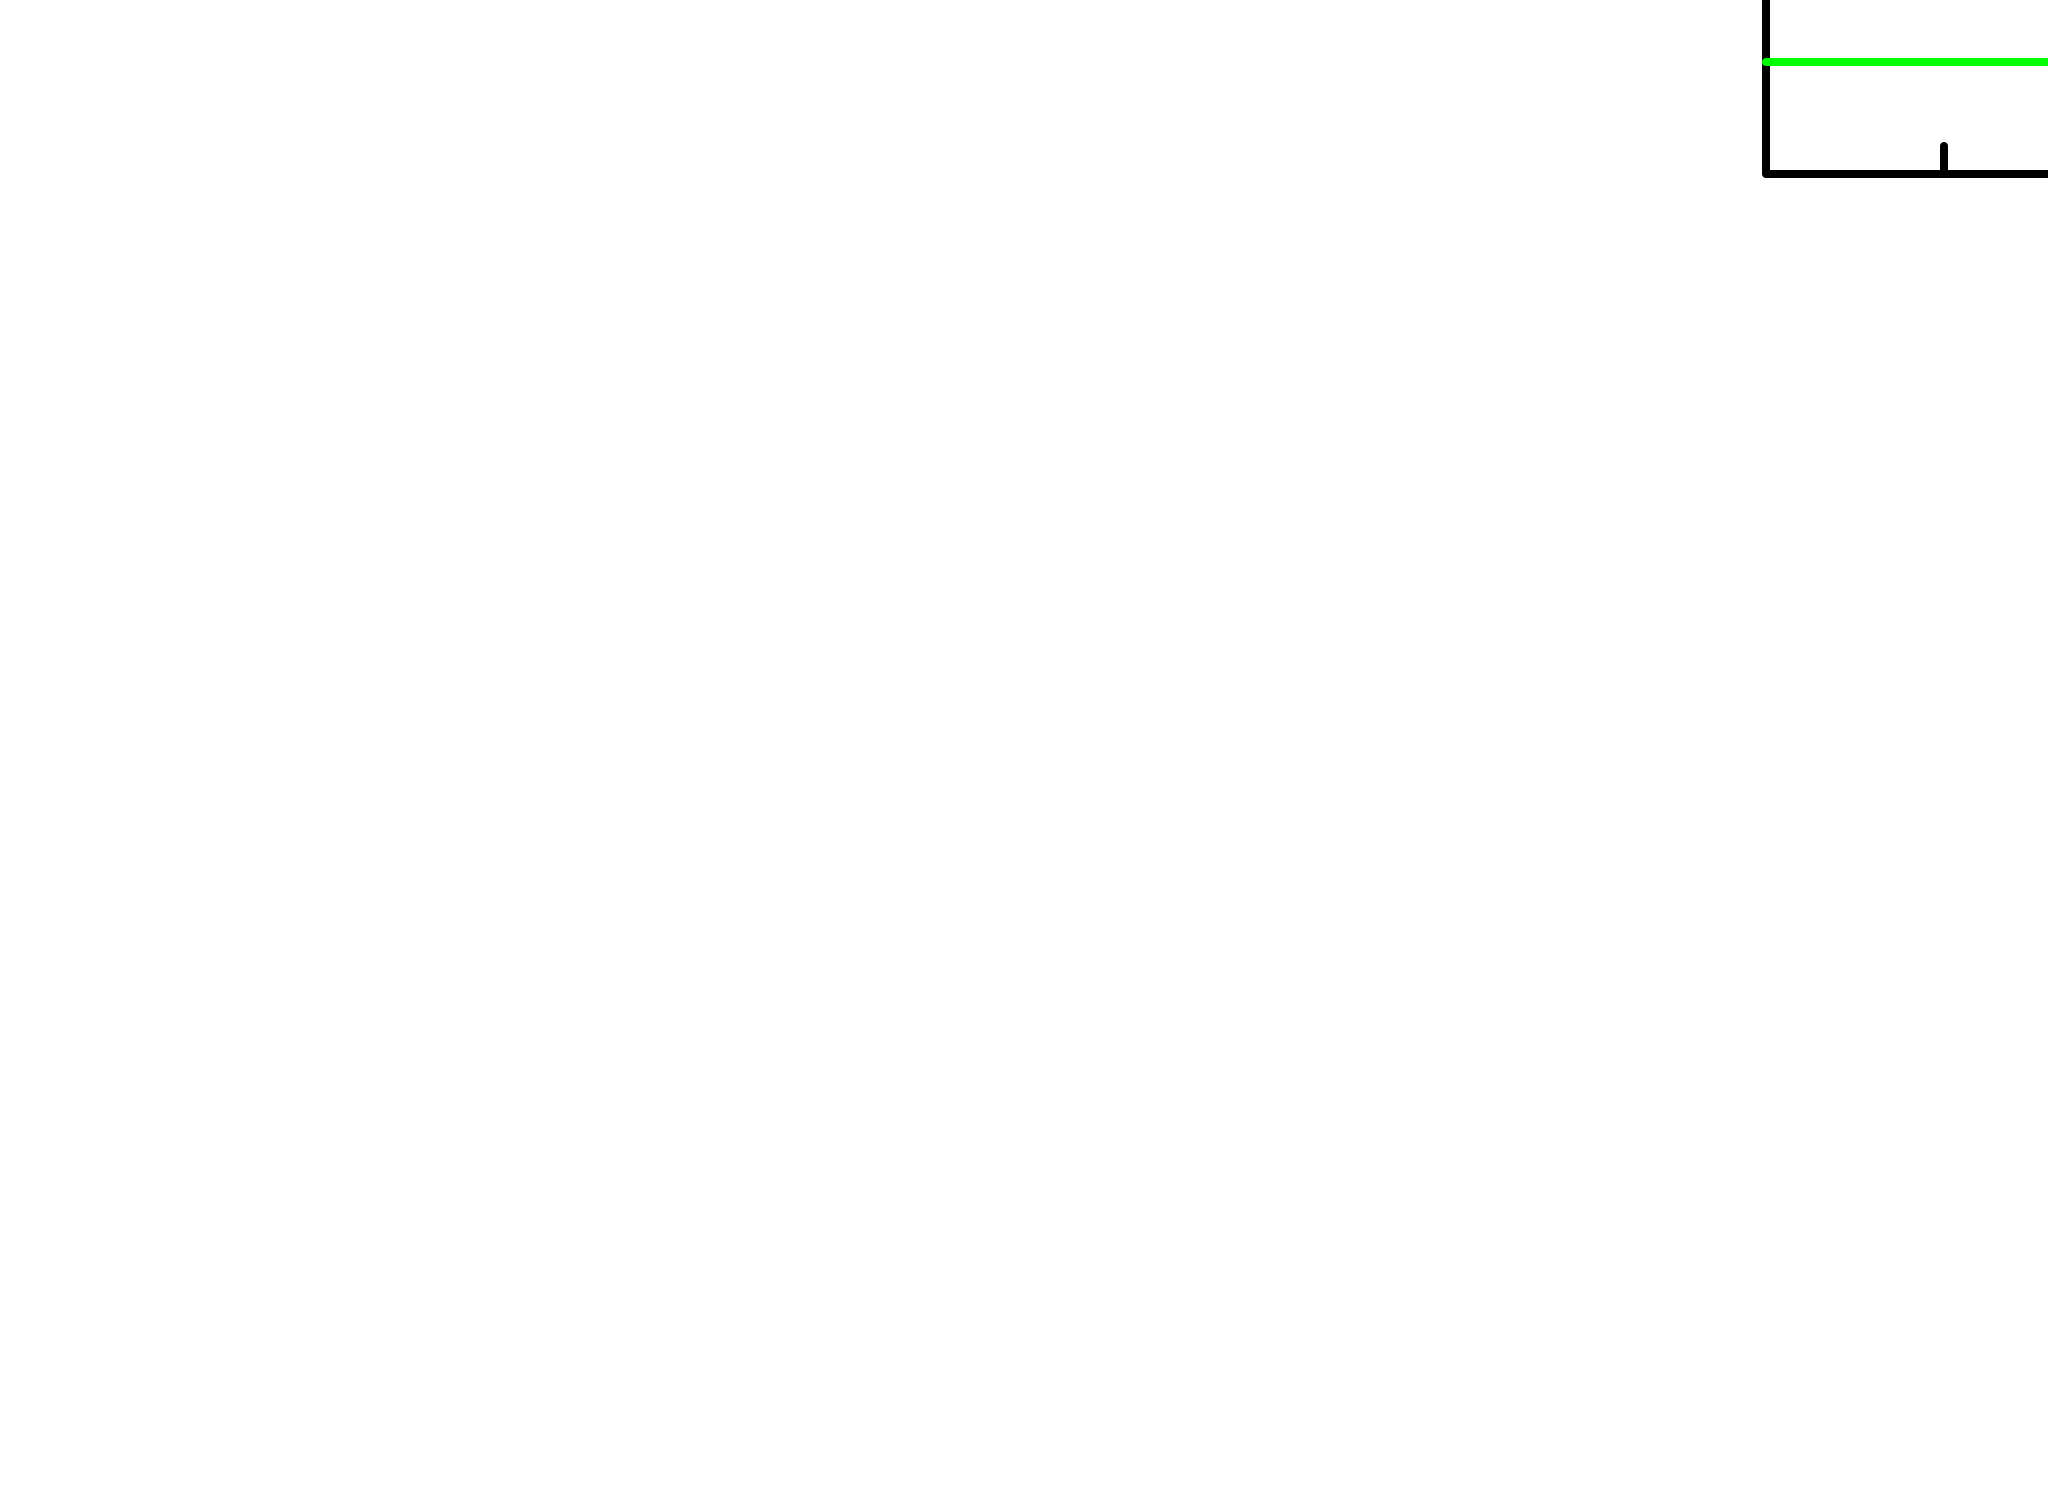

In [5]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")

In [6]:
Fit.error("1")
Fit.error("2")

 Parameter   Confidence Range (2.706)
     1      1.85304      50.1554    (-6.07326,42.2291)
 Parameter   Confidence Range (2.706)
***Warning: Zero alpha-matrix diagonal element for parameter 1
***Warning: Zero alpha-matrix diagonal element for parameter 3
 Parameter 1 is pegged at 7.9263 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.
 Parameter 3 is pegged at 8.00837e-05 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.

 Fit error occurred during lower bound error calculation.

***Warning: Number of trials exceeded before bracketing of delta fit-stat.
Last attempt: 200, with delta statistic: 0.23757

Continue error search in this direction? 
*** Parameter upper bound is INVALID.

     2            0            0    (-5.35557,-5.35557)



***XSPEC Error:  No variable parameters for fit 

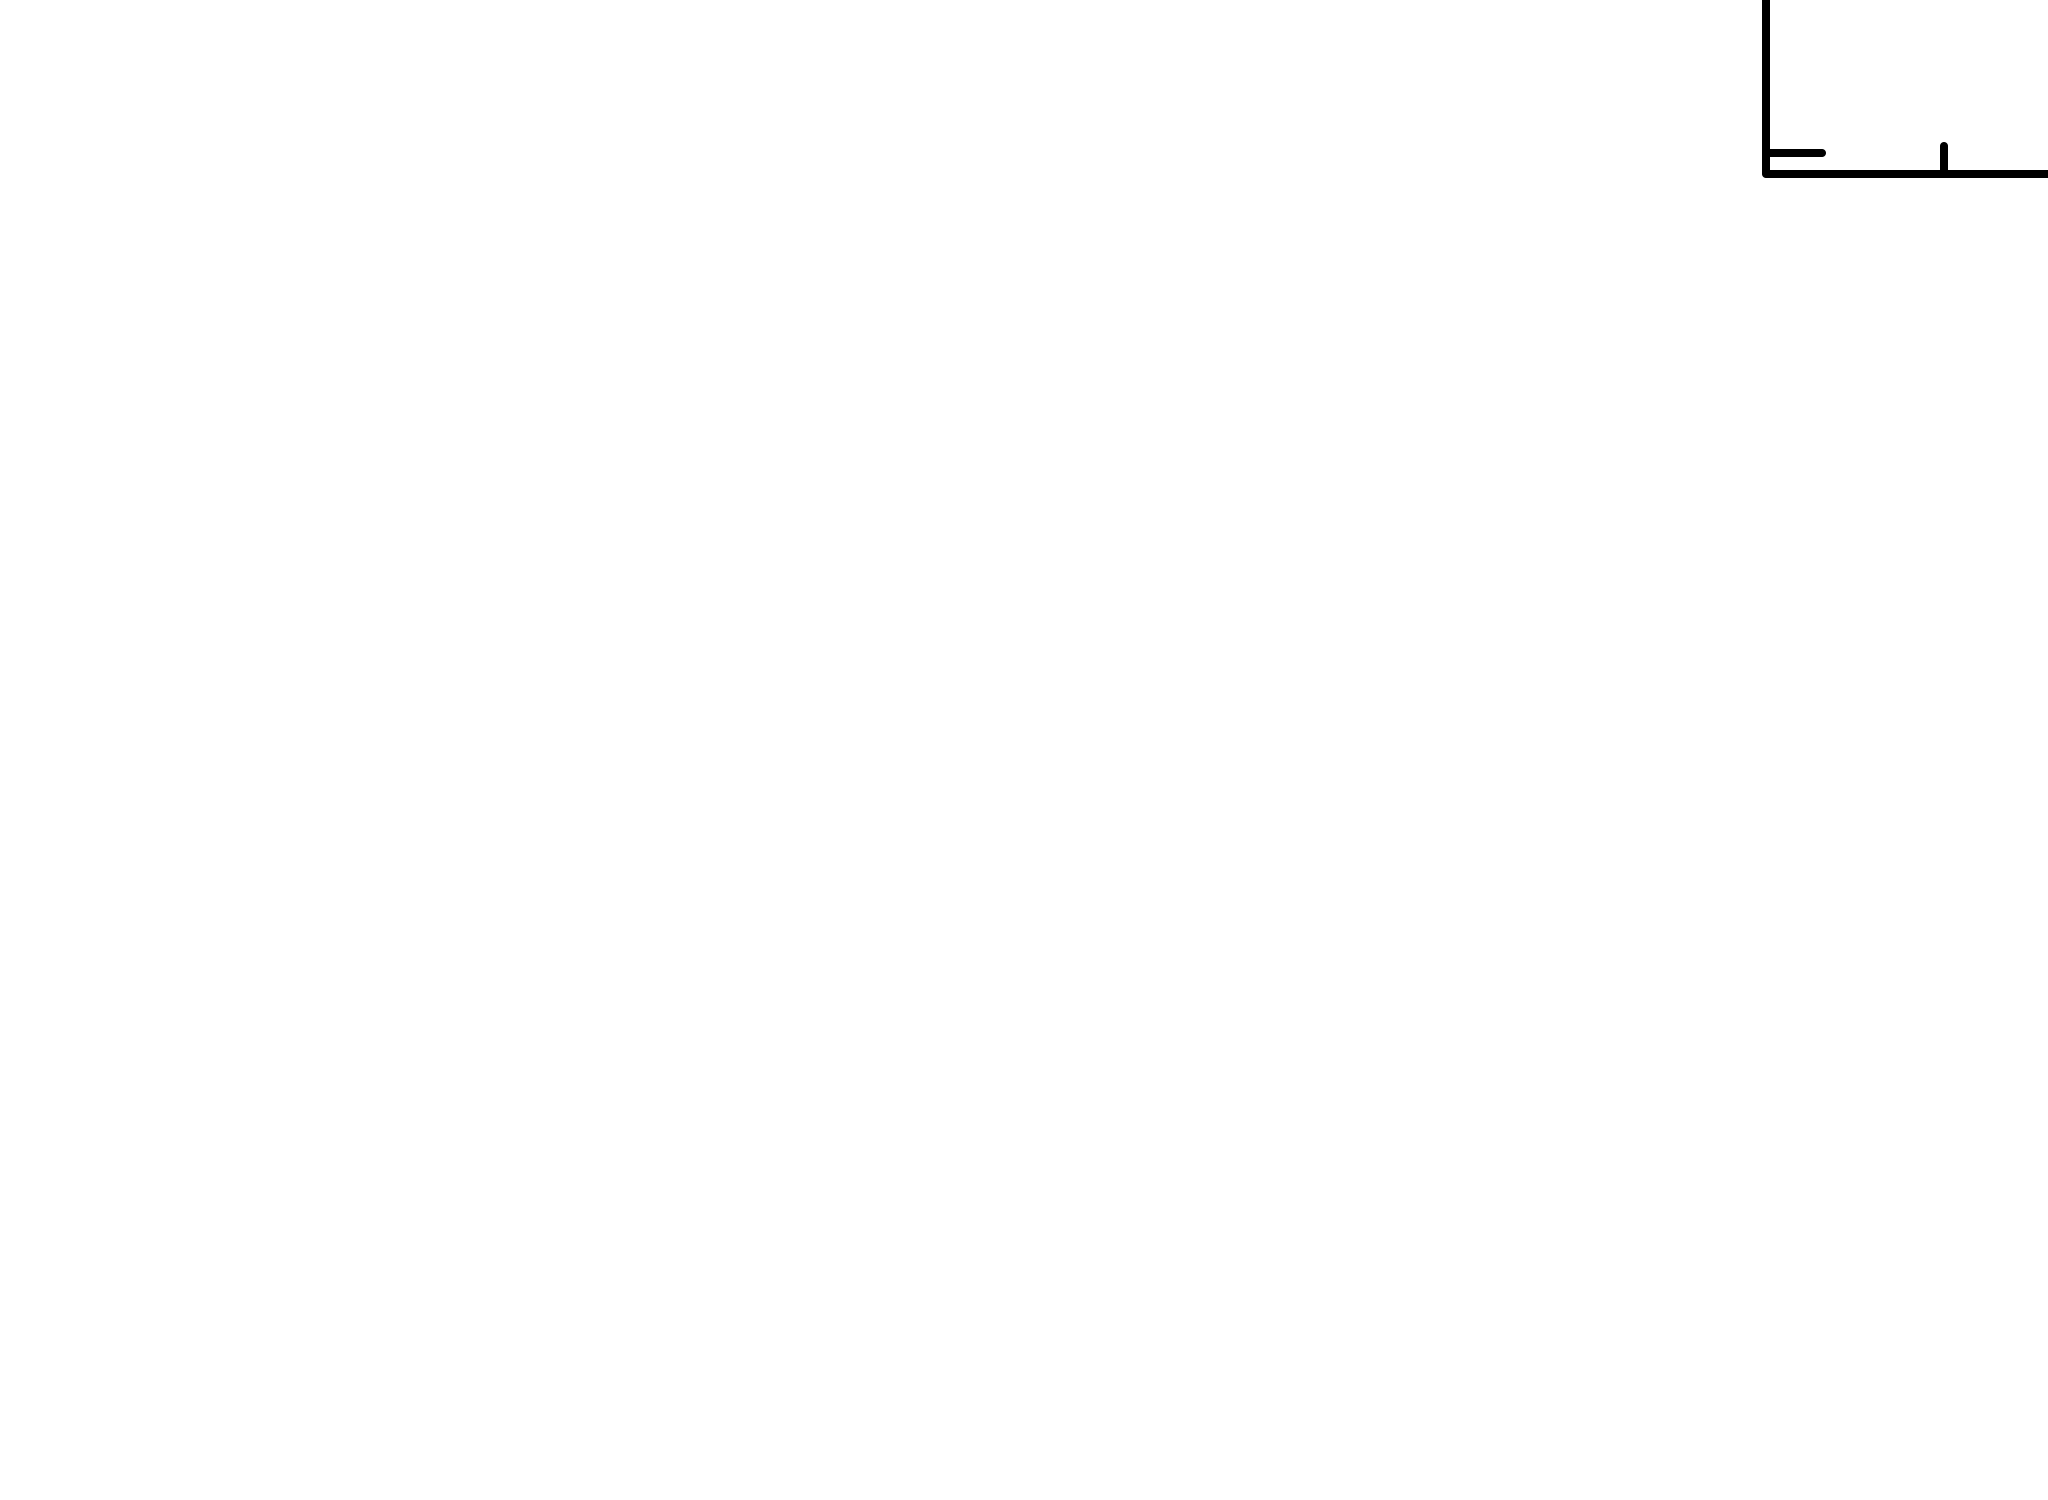


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              1.172740e+10     using 7 bins.

Test statistic : Chi-Squared              1.172740e+10     using 7 bins.
 Null hypothesis probability of 0.000000e+00 with 4 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
19.0451      0.266263     -3      0.228054       9.86120   6.0

In [7]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

In [8]:
Fit.error("1")
Fit.error("2")

Cannot do error calc: Reduced Chi^2 (= 2.82133) > maximum (2)


Exception: Error executing command: error


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.412821e+11     using 7 bins.

Test statistic : Chi-Squared              2.412821e+11     using 7 bins.
 Null hypothesis probability of 0.000000e+00 with 4 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
6.4673       0.826052     -2     0.0687597     -0.397082   1.19773e-06
6.2562       423818        0     0.0269044     -0.396747   1.21873e-06
6.1562       339440        0    0.00766484     -0.392074   1.22968e-06
6

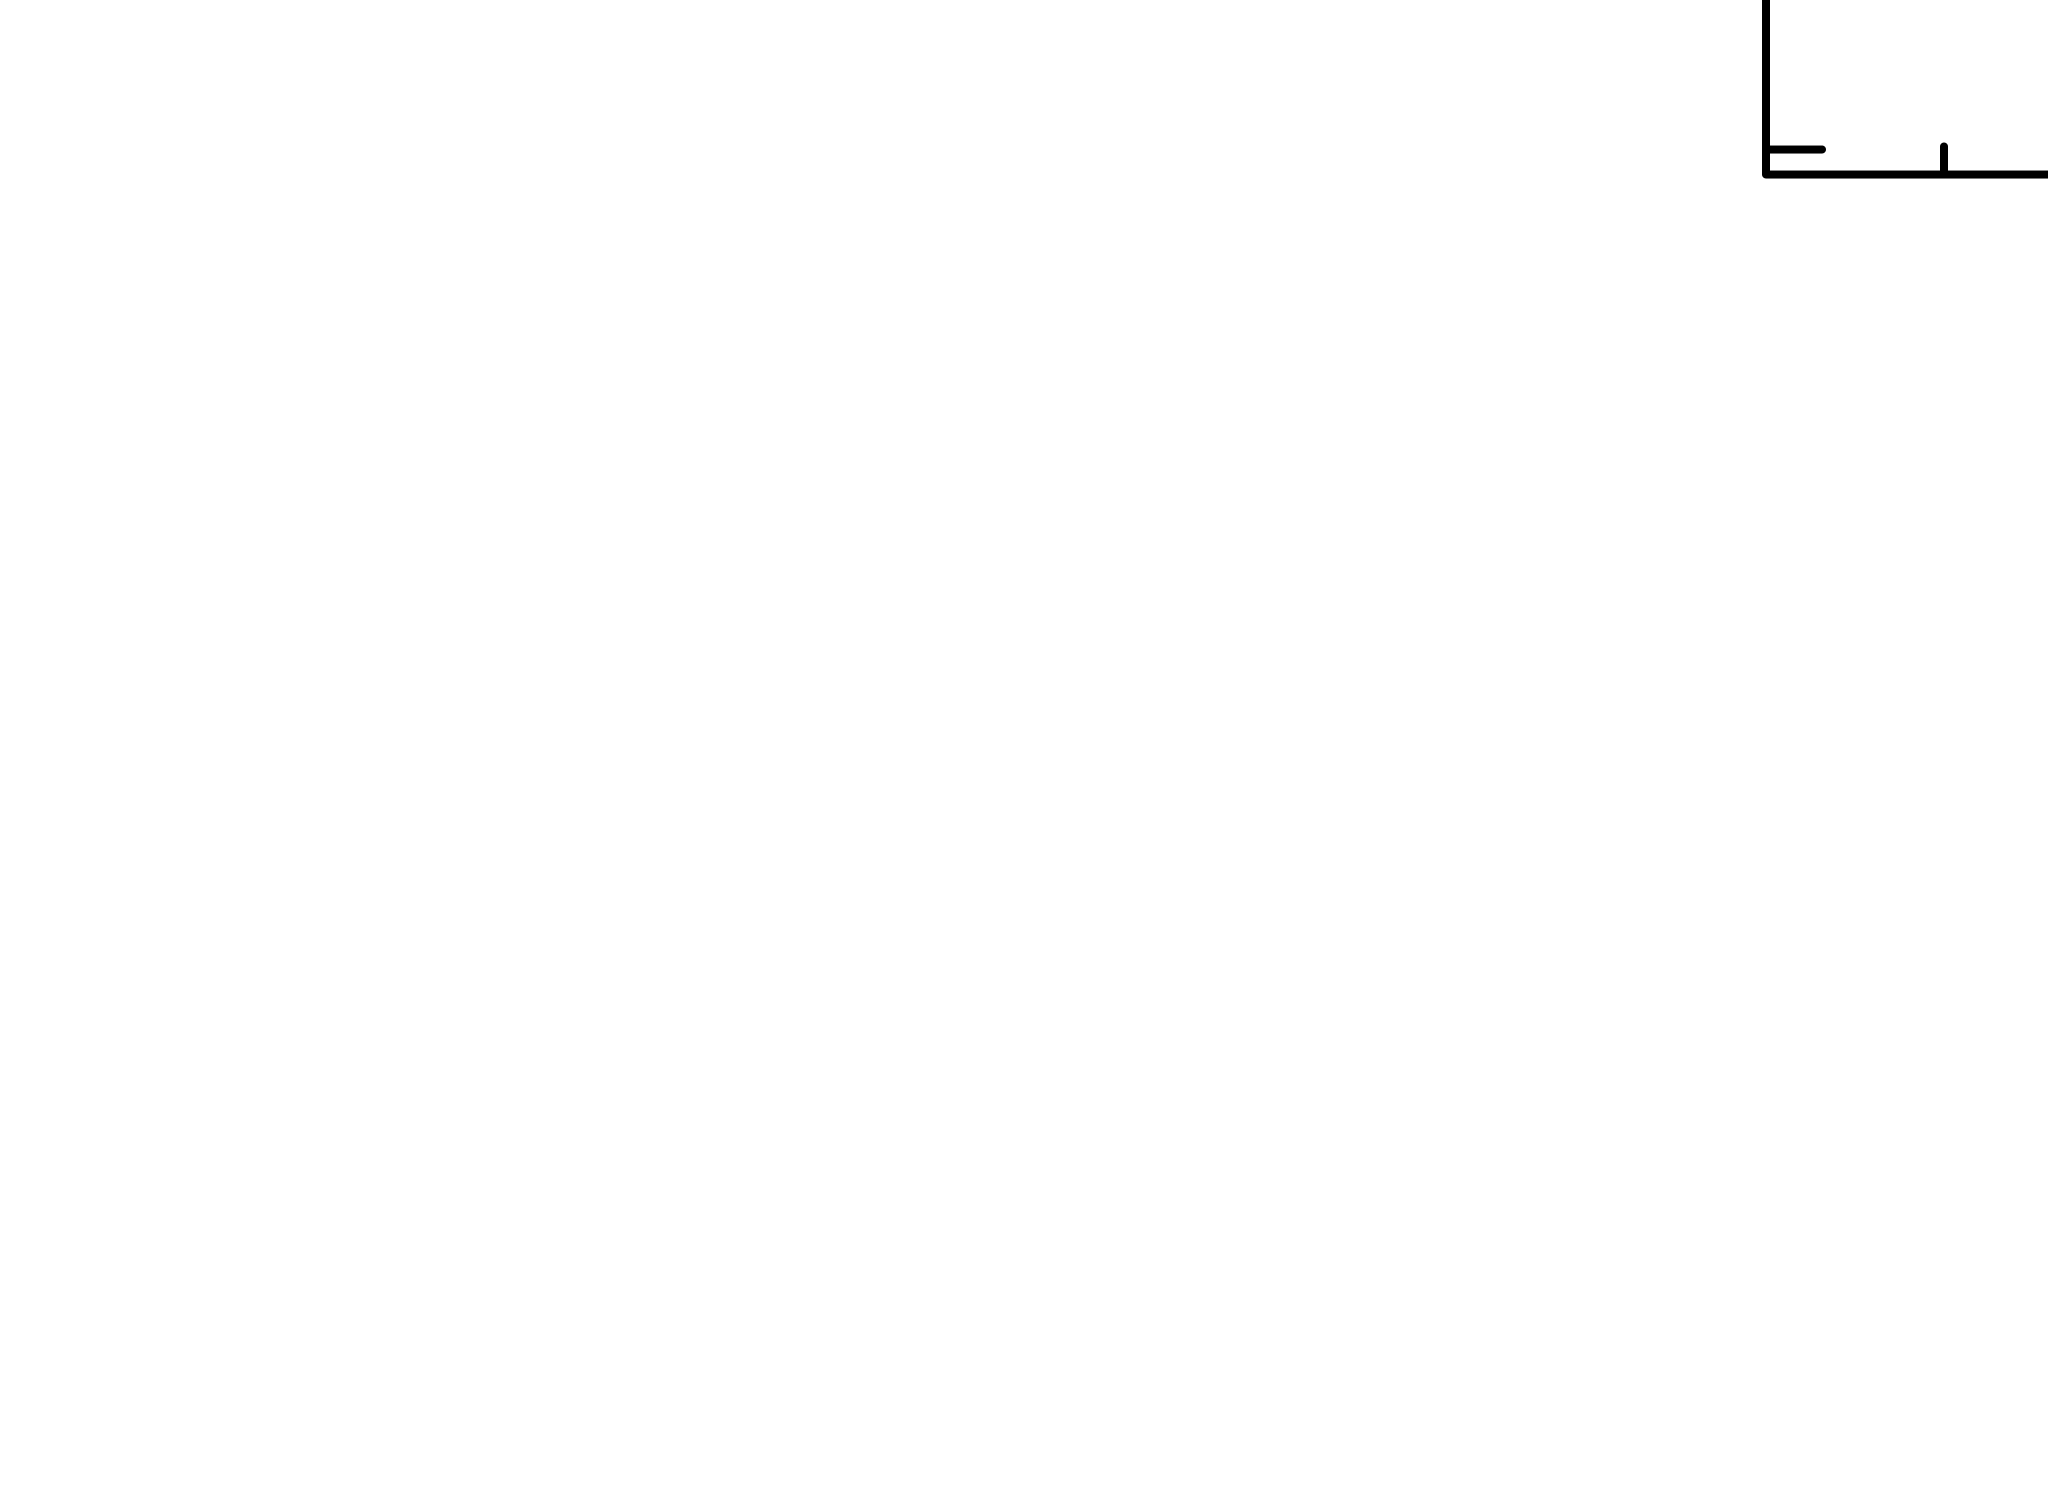

In [9]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

In [10]:
Fit.error("1")
Fit.error("2")

 Parameter   Confidence Range (2.706)
***Warning: Identical values of the parameter give different values of the statistic.
Please check your result for the low end of the confidence range.
***Warning: Zero alpha-matrix diagonal element for parameter 1
 Parameter 1 is pegged at 4.13132e-16 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.
***Warning: Zero alpha-matrix diagonal element for parameter 1
 Parameter 1 is pegged at 4.13132e-16 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.

***Warning: Number of trials exceeded before bracketing of delta fit-stat.
Last attempt: 0, with delta statistic: 0

Continue error search in this direction? 
*** Parameter upper bound is INVALID.

***Warning: Zero alpha-matrix diagonal element for parameter 1
 Parameter 1 is pegged at 4.13132e-16 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.
***Wa

In [11]:
AllModels.calcFlux(".2 12.0")

 Model Flux 2.6609e-05 photons (2.7268e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [12]:
#plx = 1.4843
d_kpc = 8
F_x = 3.5347*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

2.705914168867021e+33


In [13]:
import numpy as np
print(np.log10(L_x))

33.43231401673366


In [14]:
F_opt = 1.05*10**-5 * 10**(-0.4*20.7)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  5.510478332622621e-14
F_x / F_opt:  0.8071632608243982
